# Circulating plasma miRNA biomarker selection using QLattice

## Author: Shehbeel Arif

## Purpose: To find a set of circulating miRNAs most predictive of Low-grade Glioma relapse in platient blood plasma samples.

---

## Load libraries

In [1]:
# Library for data handling
import numpy as np
import pandas as pd

# Library for splitting data into Training and Testing datasets
from sklearn.model_selection import train_test_split

# QLattice library
import feyn

# Visualization library
import seaborn as sns


This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


## Data Preprocessing

In [3]:
# Load data
data_dir = '/Users/shehbeel/Documents/liquid-biopsy-analysis/data/'
meta = pd.read_csv(data_dir + 'lb_metadata.csv')
counts = pd.read_csv(data_dir + 'lb_plasma_matrix.csv', index_col='gene')

# Select only LGG samples
meta = meta[meta['Short_Histology'] == 'LGG']

# Transpose counts
counts = counts.iloc[:2102,]
counts = counts.T
counts = counts.reset_index()

# Merge counts and meta data
data = pd.merge(meta, counts, left_on='SDG_ID', right_on='index').drop(['index'], axis=1)

# Prepare data for QLattice
data = data.drop(['SDG_ID', 'CSF_Specimen', 'Plasma_Specimen', 'Diagnosis', 'Short_Histology', 'Tumor_Subtype', 'Survival_Status',
         'CTRL_ANT1', 'CTRL_ANT2', 'CTRL_ANT3',	'CTRL_ANT4', 'CTRL_ANT5', 'CTRL_miR_POS', 'HK_ACTB', 'HK_B2M', 'HK_GAPDH',
         'HK_PPIA', 'HK_RNU47', 'HK_RNU75', 'HK_RNY3', 'HK_RPL19', 'HK_RPL27', 'HK_RPS12', 'HK_RPS20', 'HK_SNORA66', 'HK_YWHAZ'
         ], axis=1)

# Convert target variable to boolean
data['Relapse'] = data['Relapse'].map({'Yes': True, 'No': False}) 


In [4]:
# Split the data into training and testing set
random_seed = 42
train, test = train_test_split(data, test_size = 0.2, stratify=data["Relapse"], random_state=random_seed)

---

## QLattice

**Sample and fit models**

This occurs in the following steps:

1. Sample models from the QLattice
2. Fit the models by minimizing bic
3. Update the QLattice with the best models' structures
4. Repeat the process

This is all captured within the auto_run function.

In [12]:
# Connect to QLattice
ql = feyn.QLattice() # Connecting

In [13]:
# Set the variable to predict as output
models = ql.auto_run(train, output_name='Relapse', kind='classification', 
                     criterion='bic', 
                     #max_complexity=4
                     )

In [14]:
# Choose the best model
best = models[0]

/Users/shehbeel/opt/anaconda3/lib/python3.9/site-packages/feyn/metrics/_metrics.py:263: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="140.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 491 140.0" width="491" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="95.0" width="231" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>Relapse
logistic:
w=-8.3382
bias=0.6073</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">Relapse</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">out</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="37.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>miR-891b
linear:
scale=0.021739
scale offset=51.625000
w=4.479190
bias=1.1024</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">miR-891b</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text></svg><svg class="summary" height="79" width="180" x="231" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">1.0</text></svg><svg class="summary" height="79" width="80" x="411" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Test</text><line stroke="#1E1E1E" x1="0" x2="60" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="55" y="34">0.5</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="55" y="49">1.0</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="55" y="64">nan</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="55" y="79">0.0</text></svg><svg class="h_space" height="19" width="50" x="0" y="95.0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Inputs</text><line stroke="#1E1E1E" x1="0" x2="50" y1="19" y2="19" /></svg><svg class="table" height="21" width="78" x="0" y="114.0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="12" text-anchor="start" x="5" y="16">miR-891b</text></svg></svg><h4 style='font-family:monospace; margin-bottom:5px; font-weight: normal; text-decoration: underline '>Training Metrics</h4><img style='width:auto' src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAyAAAAFeCAYAAAB9x3vwAAAAOXRFWHRTb2Z0d2FyZQBNYXRwb
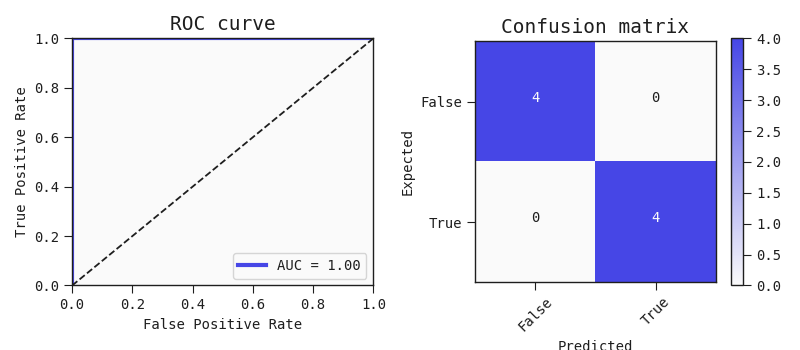
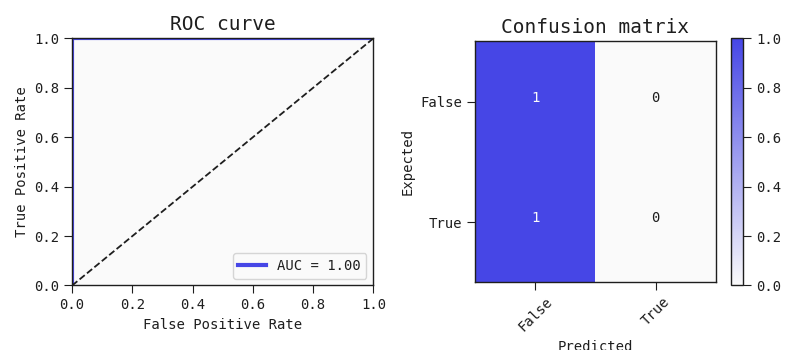

In [15]:
best.plot(train, test)

In [16]:
# Model represents basically a mathematical formula, so here is the formula:
best.sympify(signif = 2) # significant figures

logreg(33.0 - 0.81*miR-891b)

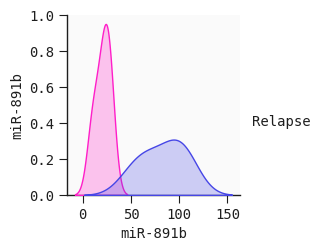

In [17]:
# Why did our graph pick up these features?

# Filter only graph features and target variable
features_data = train[best.features + ["Relapse"]]

# Pairplot with target coloring
sns.pairplot(features_data, hue = 'Relapse')

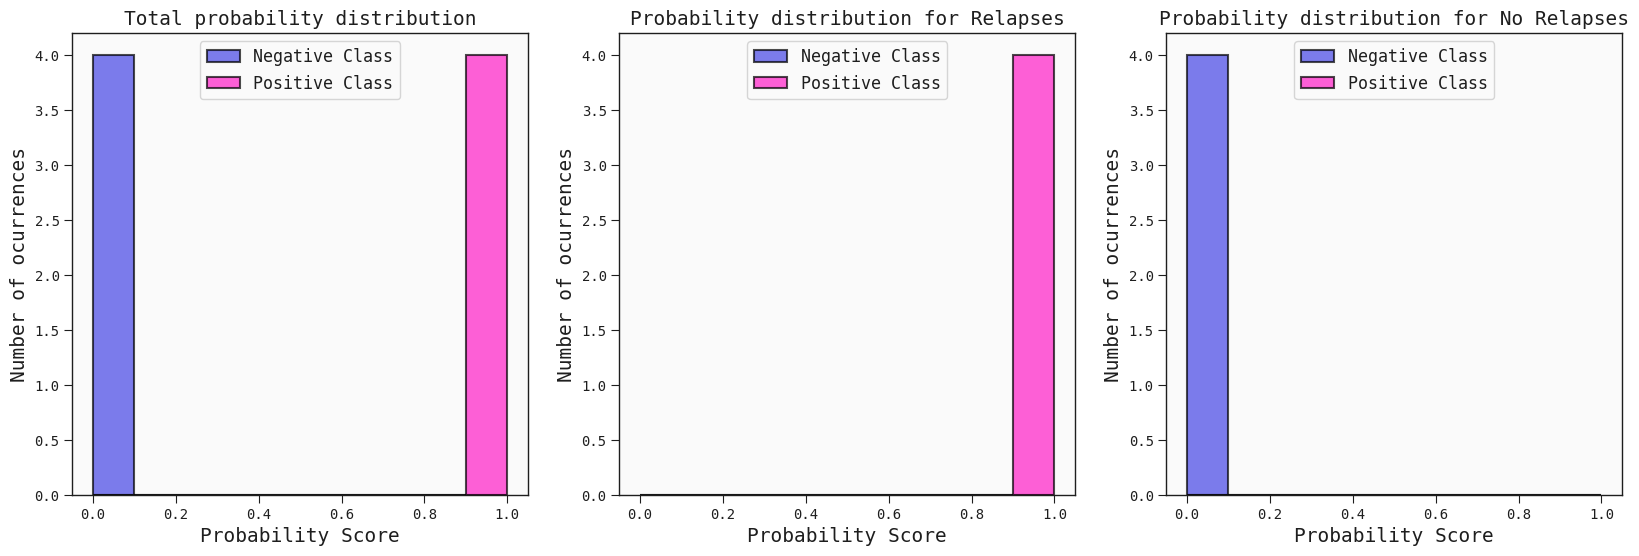

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
best.plot_probability_scores(train, title='Total probability distribution', ax=ax[0])
best.plot_probability_scores(train.query('Relapse == True'), title='Probability distribution for Relapses', ax=ax[1])
best.plot_probability_scores(train.query('Relapse == False'), title='Probability distribution for No Relapses', ax=ax[2])
plt.show()

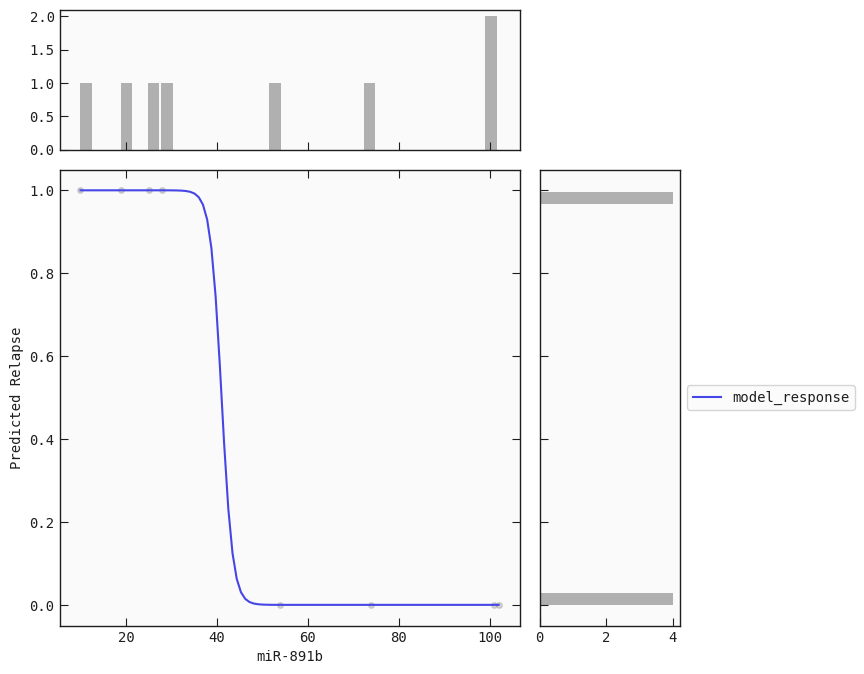

In [19]:
# Plot a 1-dimensional partial plot
best.plot_response_1d(train)

/Users/shehbeel/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


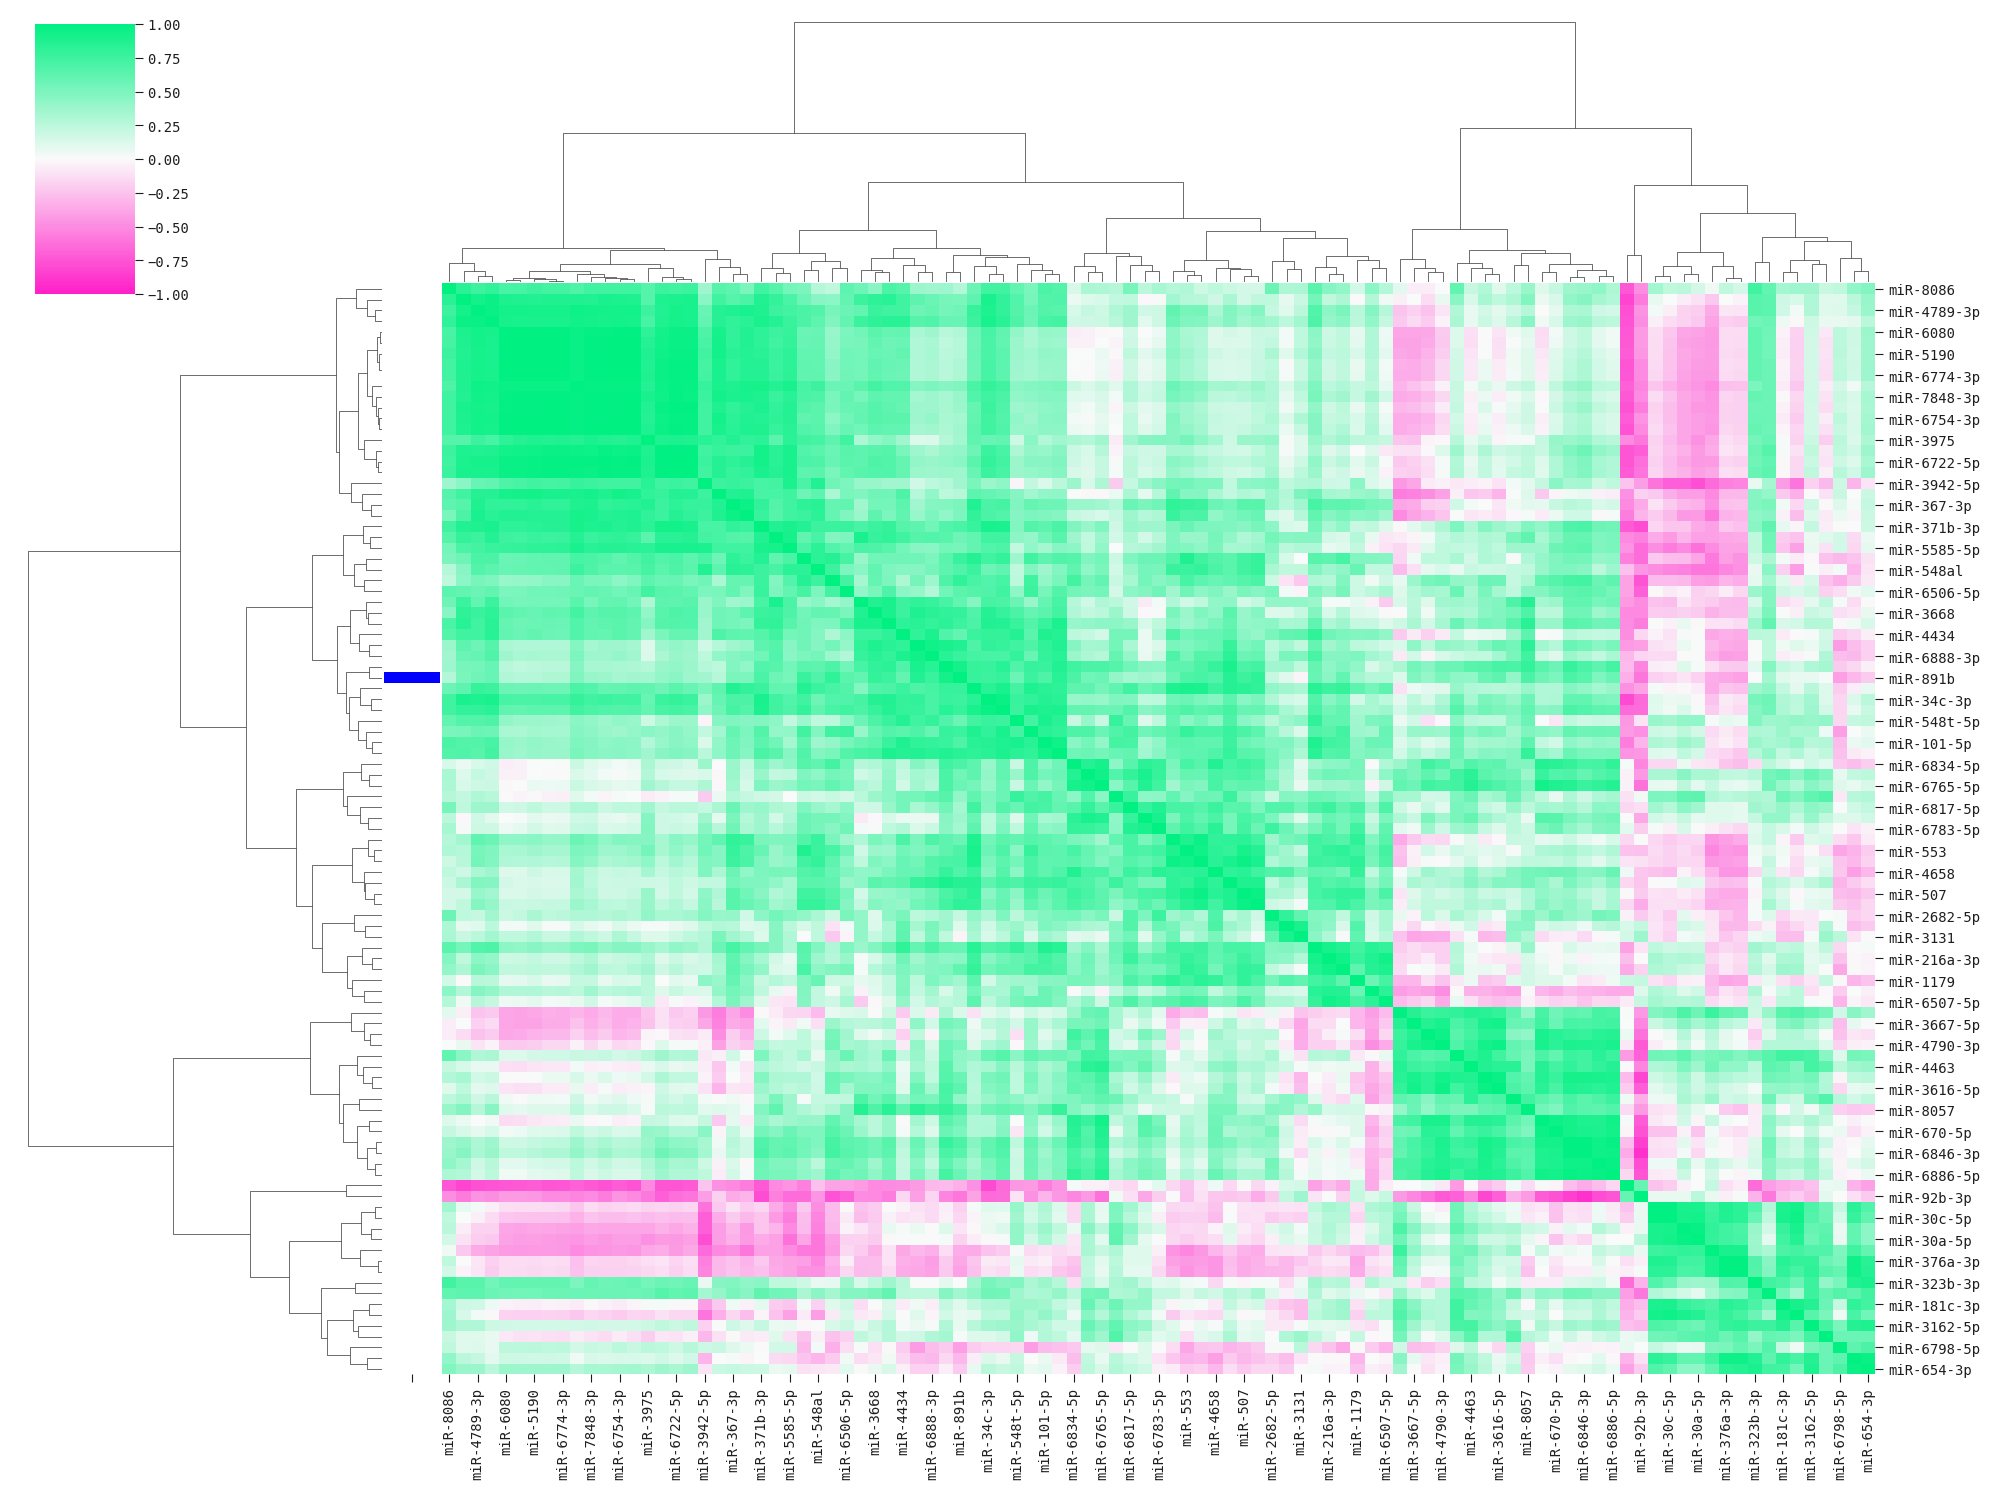

In [20]:
# Explore multicollinearity

# Take a random subset of 100 features
data_wo_target = data.drop('Relapse', axis = 1)
sampled_features = np.unique(list(np.random.choice(data_wo_target.columns, 100, replace=False)) + best.features)
sample_data = data[sampled_features]

# Prepare for labelling the two model features in the heatmap
label_feature = list()

for x, i in enumerate(sampled_features):
    if i in best.features:
        label_feature.append(1)
    else: label_feature.append(0)

# Assign colors to chosen features
lut = dict({0: 'w',
           1: 'b'})

# Map colors to correlation data
row_coloring = pd.Series(label_feature, index = sample_data.corr().index).map(lut)

# Plot heatmap
p = sns.clustermap(sample_data.corr(), method="ward", cmap='feyn-diverging', row_colors = row_coloring,
               vmin=-1, vmax=1, figsize=(20,15))

---

# Interacting with the QLattice model

In [21]:
from feyn.plots.interactive import interactive_activation_flow

In [22]:
interactive_activation_flow(models[0], train)

interactive(children=(FloatSlider(value=56.0, description='miR-891b', max=102.0, min=10.0), Output()), _dom_cl…

<function feyn.plots.interactive._graph_flow.interactive_activation_flow.<locals>.flow(**kwargs)>

---

**miR-891b in Literature:**

Dong, Q., Li, C., Che, X., Qu, J., Fan, Y., Li, X., Li, Y., Wang, Q., Liu, Y., Yang, X., & Qu, X. (2016). MicroRNA-891b is an independent prognostic factor of pancreatic cancer by targeting Cbl-b to suppress the growth of pancreatic cancer cells. Oncotarget, 7(50), 82338–82353. https://doi.org/10.18632/oncotarget.11001